## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

2. Write a short description of the data you chose, and why. (1 page)

From the GSS data, I chose the following variables to explore: year, id_, age, age of respondent, highest year of school completed, dighest degree, when received hs degree, when received college degree, respondents sex, race of respondent, living with parents when 16 yrs old, family income when 16 yrs old, was r born in this country, respondents income, ballot used for interview. I chose these variables because I thought they could show some insight on whether different uprbringings can lead to differing levels of success later in life. Additionally, I was interested in seeing the age of respondents throughout the survey.

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

In [418]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_excel("result/GSS.xlsx")
df = pd.DataFrame(df)
df.head()

,year,id_,age,educ,degree,whenhs,whencol,sex,race,family16,incom16,born,rincome,ballot
0,1972,1,23,4 years of college,Bachelor's,.i: Inapplicable,.i: Inapplicable,FEMALE,White,FATHER,AVERAGE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,70,10th grade,Less than high school,.i: Inapplicable,.i: Inapplicable,MALE,White,M AND F RELATIVES,ABOVE AVERAGE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,48,12th grade,High school,.i: Inapplicable,.i: Inapplicable,FEMALE,White,MOTHER & FATHER,AVERAGE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,27,5 years of college,Bachelor's,.i: Inapplicable,.i: Inapplicable,FEMALE,White,MOTHER & FATHER,AVERAGE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,61,12th grade,High school,.i: Inapplicable,.i: Inapplicable,FEMALE,White,MOTHER & FATHER,BELOW AVERAGE,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [419]:
# Remove rows where any column contains ".i", ".r", ".a", ".s", or ".d"
df = df[~df.astype(str).apply(lambda x: x.str.contains(r'\.i|\.r|\.a|\.s|\.d|\.n', regex=True)).any(axis=1)]

In [420]:
df.head(15)

,year,id_,age,educ,degree,whenhs,whencol,sex,race,family16,incom16,born,rincome,ballot
68846,2022,1,72,4 years of college,Bachelor's,-70,-70,FEMALE,White,MOTHER & FATHER,ABOVE AVERAGE,YES,$25000 OR MORE,Ballot c
68848,2022,3,57,12th grade,High school,-70,-70,FEMALE,White,MOTHER & STPFATHER,BELOW AVERAGE,YES,$25000 OR MORE,Ballot c
68849,2022,4,23,4 years of college,Bachelor's,-70,-70,FEMALE,White,MOTHER & FATHER,ABOVE AVERAGE,YES,$5000 TO 5999,Ballot a
68851,2022,6,27,12th grade,High school,-70,-70,MALE,White,MOTHER & FATHER,FAR BELOW AVERAGE,YES,$25000 OR MORE,Ballot c
68852,2022,7,20,12th grade,High school,-70,-70,FEMALE,Other,MOTHER & FATHER,AVERAGE,YES,$25000 OR MORE,Ballot c
68853,2022,8,47,4 years of college,Graduate,-70,-70,MALE,White,MOTHER & FATHER,BELOW AVERAGE,YES,$25000 OR MORE,Ballot c
68854,2022,9,31,12th grade,High school,-70,-70,FEMALE,White,OTHER,AVERAGE,YES,$15000 - 19999,Ballot a
68857,2022,12,25,4 years of college,Bachelor's,-70,-70,FEMALE,White,MOTHER & FATHER,ABOVE AVERAGE,YES,$25000 OR MORE,Ballot c
68858,2022,13,35,12th grade,High school,-70,-70,FEMALE,White,MOTHER & FATHER,BELOW AVERAGE,YES,$25000 OR MORE,Ballot b
68859,2022,14,36,12th grade,High school,-70,-70,FEMALE,White,MOTHER & FATHER,BELOW AVERAGE,YES,LT $1000,Ballot c


In [421]:
# these columns don't provide any valuable information so they should be dropped
df = df.drop(columns=["whenhs", "whencol", "ballot"])
df.head()

,year,id_,age,educ,degree,sex,race,family16,incom16,born,rincome
68846,2022,1,72,4 years of college,Bachelor's,FEMALE,White,MOTHER & FATHER,ABOVE AVERAGE,YES,$25000 OR MORE
68848,2022,3,57,12th grade,High school,FEMALE,White,MOTHER & STPFATHER,BELOW AVERAGE,YES,$25000 OR MORE
68849,2022,4,23,4 years of college,Bachelor's,FEMALE,White,MOTHER & FATHER,ABOVE AVERAGE,YES,$5000 TO 5999
68851,2022,6,27,12th grade,High school,MALE,White,MOTHER & FATHER,FAR BELOW AVERAGE,YES,$25000 OR MORE
68852,2022,7,20,12th grade,High school,FEMALE,Other,MOTHER & FATHER,AVERAGE,YES,$25000 OR MORE


In [422]:
# replace values with "No answer" to na
df = df.replace("No answer", pd.NA)

# refine the age column to get it ready for visualization
df["age"] = df["age"].replace("89 or older", 89)

# drop na values
df["age"] = df["age"].dropna()


In [423]:
df["age"].unique()

array(['72', '57', '23', '27', '20', '47', '31', '25', '35', '36', '80',
       '34', '65', '60', '28', '59', '46', '38', '64', '49', '29', '30',
       '50', '32', '52', '70', '73', '58', '41', '55', '86', '44', '79',
       '26', '63', '40', '61', '48', '42', '43', '56', '24', '68', '74',
       '39', '51', '53', '62', '54', '37', '45', '66', '33', '21', '69',
       '67', '22', '77', '71', '18', '76', '75', '19', '84', '81', '83',
       89, '78'], dtype=object)

In [424]:
# Convert the age column to numeric and coerce errors to nan values
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# Drop any remaining nan values after conversion
df = df.dropna(subset=["age"])

4. Produce some numeric summaries and visualizations. (1-3 pages)

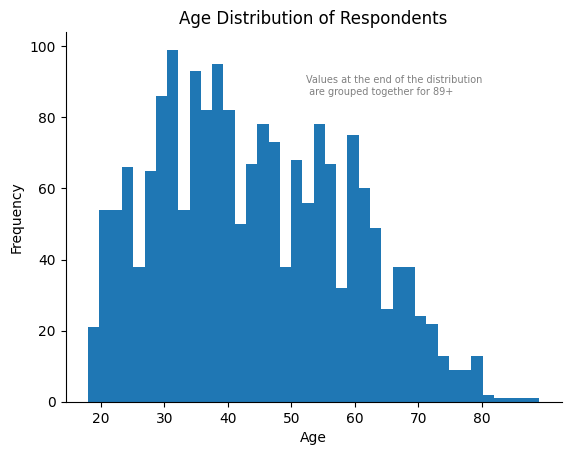

In [425]:
# Create a histogram of the age distribution of the respondents
df["age"] = df["age"].astype(int)
                             
import matplotlib.pyplot as plt
plt.hist(df["age"], bins=40)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Respondents")

# Make x axis tick marks only show every 5 years
plt.xticks(range(20, 90, 10))

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figtext(0.5, 0.75, "Values at the end of the distribution \n are grouped together for 89+", fontsize = 7, color = "grey")
plt.show()

In [426]:
income_group = {
    "FAR ABOVE AVERAGE": 5,
    "ABOVE AVERAGE": 4,
    "AVERAGE": 3,
    "BELOW AVERAGE": 2,
    "FAR BELOW AVERAGE": 1
}

# Apply mapping while keeping valid values
df["incom16"] = df["incom16"].map(income_group)


In [427]:
print(df["incom16"].unique())

[4 2 1 3 5]


In [428]:
df["incom16"] = pd.to_numeric(df["incom16"], errors="coerce")

In [429]:
print(df[["family16", "incom16"]].head())  # Check first few rows
print(df[["family16", "incom16"]].isna().sum())  # Count missing values
df["family16"].unique()

                 family16  incom16
68846     MOTHER & FATHER        4
68848  MOTHER & STPFATHER        2
68849     MOTHER & FATHER        4
68851     MOTHER & FATHER        1
68852     MOTHER & FATHER        3
family16    0
incom16     0
dtype: int64


array(['MOTHER & FATHER', 'MOTHER & STPFATHER', 'OTHER', 'MOTHER',
       'FATHER & STPMOTHER', 'M AND F RELATIVES', 'FEMALE RELATIVE',
       'FATHER', 'MALE RELATIVE'], dtype=object)

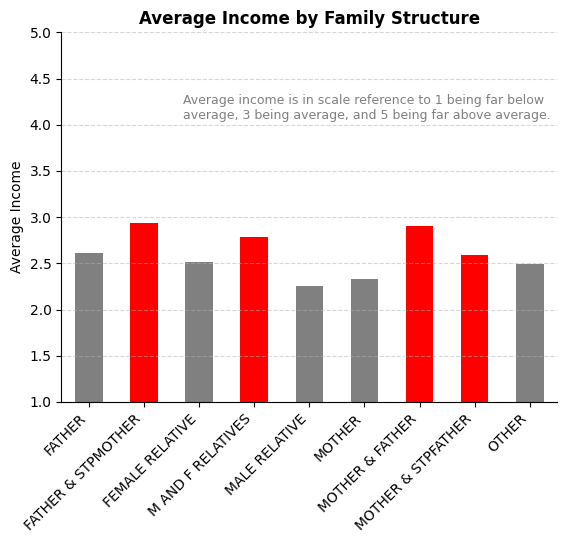

In [430]:
# Define categories with two relatives that should be colored red
two_relatives = ["MOTHER & FATHER", "MOTHER & STPFATHER", "FATHER & STPMOTHER", "M AND F RELATIVES"]

# Group data by family structure and calculate mean income
income_means = df.groupby("family16")["incom16"].mean()

# Assign colors based on whether the family structure is in the two_relatives list
colors = ["red" if family in two_relatives else "gray" for family in income_means.index]

# Create bar plot with custom colors
income_means.plot(kind="bar", color=colors)
plt.xticks(rotation = 45, ha='right')
plt.ylabel("Average Income")
plt.xlabel("")
plt.ylim(1, 5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(axis = "y", linestyle = "--", alpha = 0.5)

plt.title("Average Income by Family Structure", fontweight = "bold")
plt.figtext(0.6, 0.7, "Average income is in scale reference to 1 being far below \n average, 3 being average, and 5 being far above average.", horizontalalignment="center", fontsize=9, color = "gray")
plt.show()


In [431]:
df.head()

,year,id_,age,educ,degree,sex,race,family16,incom16,born,rincome
68846,2022,1,72,4 years of college,Bachelor's,FEMALE,White,MOTHER & FATHER,4,YES,$25000 OR MORE
68848,2022,3,57,12th grade,High school,FEMALE,White,MOTHER & STPFATHER,2,YES,$25000 OR MORE
68849,2022,4,23,4 years of college,Bachelor's,FEMALE,White,MOTHER & FATHER,4,YES,$5000 TO 5999
68851,2022,6,27,12th grade,High school,MALE,White,MOTHER & FATHER,1,YES,$25000 OR MORE
68852,2022,7,20,12th grade,High school,FEMALE,Other,MOTHER & FATHER,3,YES,$25000 OR MORE


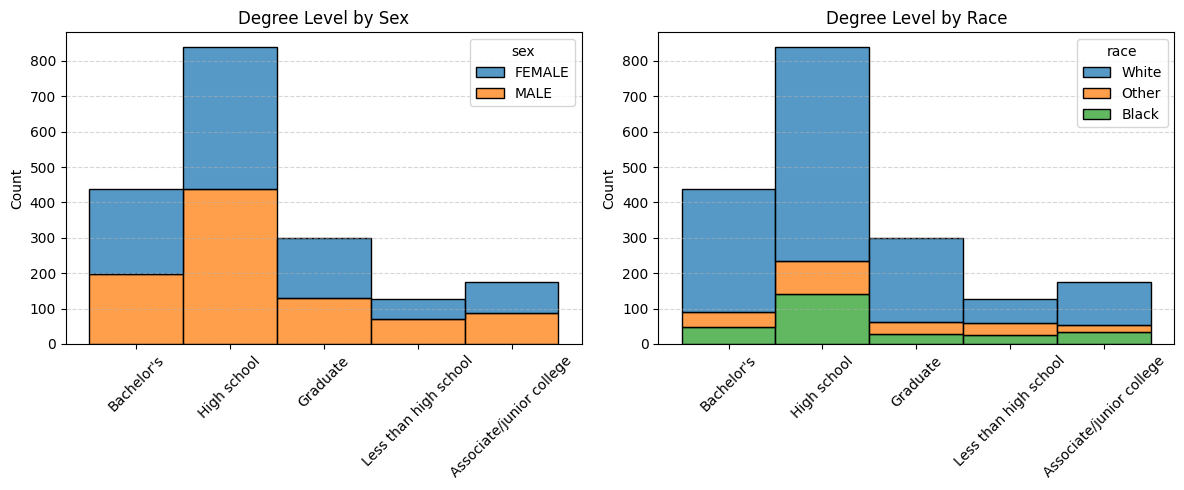

In [432]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Degree Level vs. Sex
sns.histplot(data=df, x="degree", hue="sex", multiple="stack", ax=axs[0])
axs[0].set_title("Degree Level by Sex")
axs[0].set_xlabel("")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis = "y", linestyle = "--", alpha = 0.5)

# Second Histogram: Degree Level vs. Race
sns.histplot(data=df, x="degree", hue="race", multiple="stack", ax=axs[1])
axs[1].set_title("Degree Level by Race")
axs[1].set_xlabel("")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis = "y", linestyle = "--", alpha = 0.5)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show plot
plt.show()


5. Describe your findings in 1-2 pages.

The first graph I created is a histogram representing the age distribution of respondents in the dataset. The x-axis denotes age, while the y-axis shows the frequency of respondents in each age group. The distribution appears slightly right-skewed, with the highest concentration of respondents between the ages of 25 and 50, suggesting that the majority of individuals surveyed fall within this range. There are noticeable fluctuations in frequency among age groups, which could be due to sampling differences or demographic trends. The number of respondents declines steadily beyond age 60, with very few respondents over 80, reflecting the natural decrease in population size at older ages. One last thing to note, people 89+ were grouped together so the actual age of this person was not recorded but there was only one value for this subset so it did not affect the graph too much. Overall, the histogram effectively illustrates the age composition of the surveyed group, providing a foundation for further analysis of demographic trends.

The second graph is a bar graph examining the relationship between family structure and average income. The x-axis represents family structure, while the y-axis indicates the average income of respondents within each subgroup. The results show that individuals with two parental figures tend to have higher average incomes than those with one or none, suggesting a potential correlation between family structure and financial outcomes in adulthood. Notably, none of the groups had an average income above the national average, which is somewhat surprising. While respondents in the "father and stepmother" and "father and mother" groups had the highest average incomes, these figures still fell below the national average of 3.0 (as represented in the graph). This discrepancy may be due to response bias, where higher-earning individuals were less likely to participate in the survey. The findings suggest that the surveyed population may be less financially well-off than the national average, warranting further investigation.

The third graph is a stacked histogram subplot analyzing the distribution of respondents' degree levels by sex (left subplot) and race (right subplot). This visualization provides valuable insights into educational attainment across demographic groups. In the left histogram, the highest concentration of respondents falls under the "High School" category, with an approximately equal split between men and women. However, the "Graduate" category has a higher proportion of women, suggesting that women may pursue higher education at greater rates than men. In the right histogram, the "High School" category also has the highest number of respondents. White individuals constitute the largest proportion across all degree levels, which may reflect a response bias in survey participation. Black and "Other" racial groups are present in smaller but noticeable proportions. These disparities in educational attainment could stem from various factors, including socioeconomic status, access to education, and systemic barriers. Overall, this graph effectively highlights educational disparities across demographic groups, offering a basis for further exploration of access to higher education.